<a href="https://colab.research.google.com/github/swati23/covid-19-/blob/master/Global_Covid19_Forcasting_using_linear_regression_and_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
covid=pd.read_csv('https://raw.githubusercontent.com/swati23/covid-19-/master/covid_19_data.csv')

In [3]:
covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19923,19924,04/29/2020,Wyoming,US,2020-04-30 02:32:27,545.0,7.0,0.0
19924,19925,04/29/2020,Xinjiang,Mainland China,2020-04-30 02:32:27,76.0,3.0,73.0
19925,19926,04/29/2020,Yukon,Canada,2020-04-30 02:32:27,11.0,0.0,0.0
19926,19927,04/29/2020,Yunnan,Mainland China,2020-04-30 02:32:27,185.0,2.0,181.0


In [0]:
covid.drop('SNo',axis=1,inplace=True)

In [0]:
covid['ObservationDate']=pd.to_datetime(covid['ObservationDate'])

In [6]:
covid

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
19923,2020-04-29,Wyoming,US,2020-04-30 02:32:27,545.0,7.0,0.0
19924,2020-04-29,Xinjiang,Mainland China,2020-04-30 02:32:27,76.0,3.0,73.0
19925,2020-04-29,Yukon,Canada,2020-04-30 02:32:27,11.0,0.0,0.0
19926,2020-04-29,Yunnan,Mainland China,2020-04-30 02:32:27,185.0,2.0,181.0


In [0]:
covid_datewise=covid.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

In [8]:
covid_datewise

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-04-25,2896746.0,202846.0,816685.0
2020-04-26,2971475.0,206544.0,865733.0
2020-04-27,3041764.0,211167.0,893967.0


In [0]:
## Bar Graph of date vs confirmed cases 

<function matplotlib.pyplot.show>

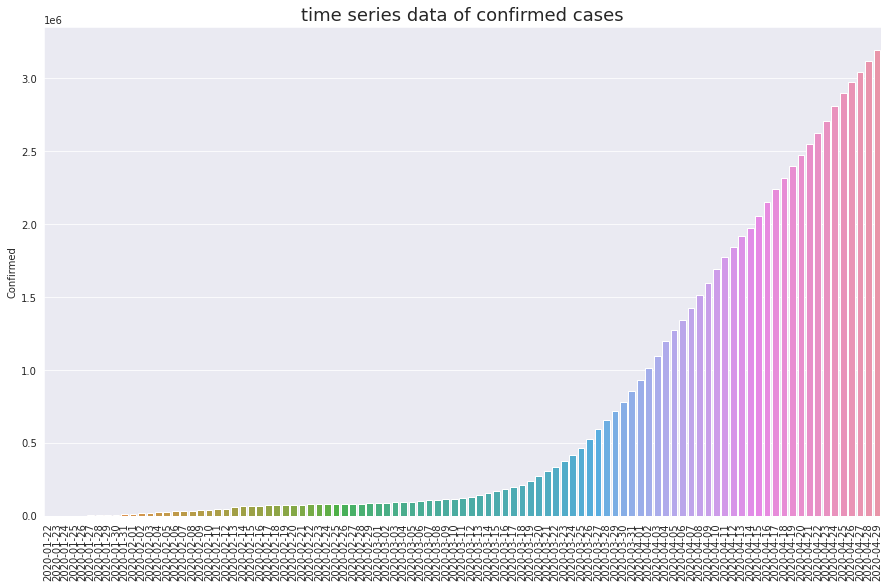

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,9))
sns.barplot(x=covid_datewise.index.date,y=covid_datewise['Confirmed'])
plt.title('time series data of confirmed cases', fontsize=18)
plt.xticks(rotation=90)
plt.show

In [0]:
covid_datewise['Mortality Rate']=(covid_datewise['Deaths']/covid_datewise['Confirmed'])*100

In [0]:
# covid_datewise['Active']=(covid_datewise['Confirmed']-covid_datewise['Deaths']-covid_datewise['Recovered'])


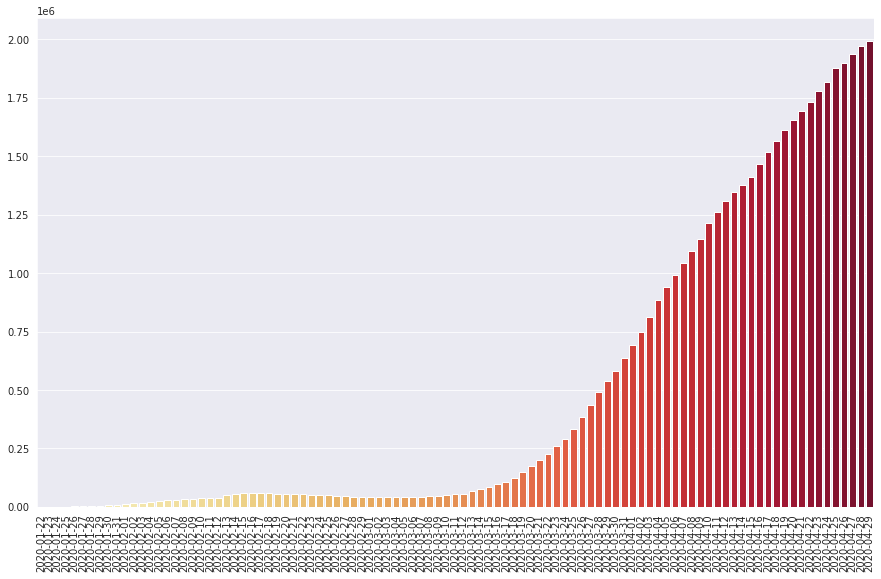

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,9))
sns.barplot(x=covid_datewise.index.date,y=covid_datewise['Confirmed']-covid_datewise['Deaths']-covid_datewise['Recovered'],palette = "YlOrRd")
plt.xticks(rotation=90)
plt.show()


In [0]:
#mortality rate 

In [0]:
covid_datewise['Mortality Rate']=(covid_datewise['Deaths']/covid_datewise['Confirmed'])*100

In [15]:
covid_datewise

,Confirmed,Deaths,Recovered,Mortality Rate
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,3.063063
2020-01-23,653.0,18.0,30.0,2.756508
2020-01-24,941.0,26.0,36.0,2.763018
2020-01-25,1438.0,42.0,39.0,2.920723
2020-01-26,2118.0,56.0,52.0,2.644004
...,...,...,...,...
2020-04-25,2896746.0,202846.0,816685.0,7.002547
2020-04-26,2971475.0,206544.0,865733.0,6.950891
2020-04-27,3041764.0,211167.0,893967.0,6.942255


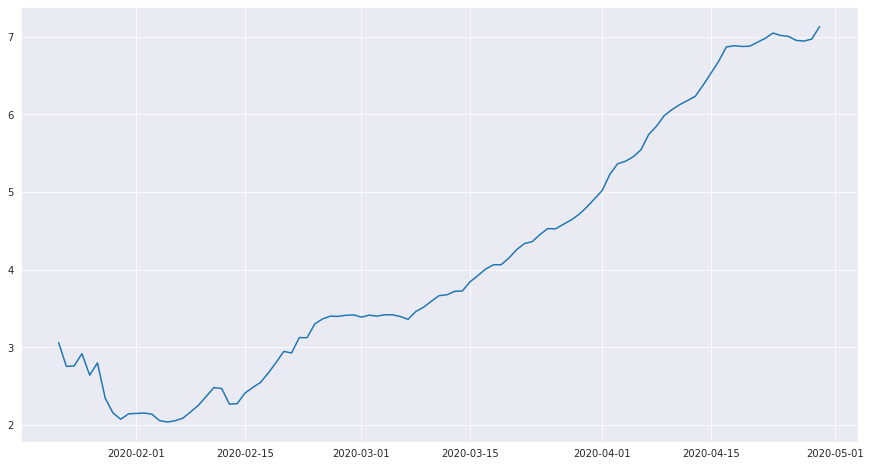

In [16]:
plt.figure(figsize=(15,8))
plt.plot(covid_datewise['Mortality Rate'],label='Mortality Rate')
plt.show()

In [0]:
#Recovery Rate

In [0]:
covid_datewise['Recovered']=(covid_datewise['Recovered']/covid_datewise['Confirmed'])*100

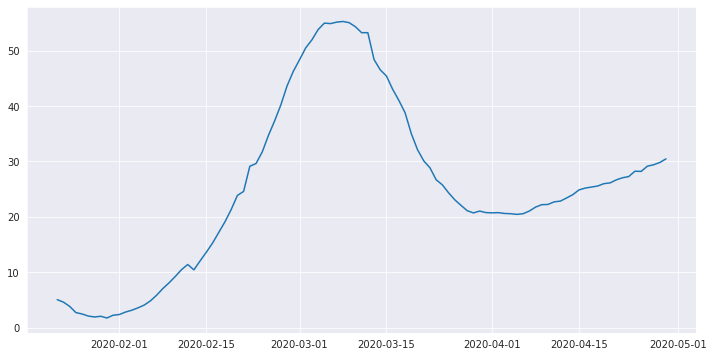

In [19]:
plt.figure(figsize=(12,6))
plt.plot(covid_datewise['Recovered'], label = 'Recovered')
plt.show()


In [0]:
#Forecasting

In [0]:
covid_datewise['Days']=covid_datewise.index-covid_datewise.index[0]

In [0]:
covid_datewise['Days']=covid_datewise['Days'].dt.days

In [23]:
covid_datewise

,Confirmed,Deaths,Recovered,Mortality Rate,Days
ObservationDate,,,,,
2020-01-22,555.0,17.0,5.045045,3.063063,0
2020-01-23,653.0,18.0,4.594181,2.756508,1
2020-01-24,941.0,26.0,3.825717,2.763018,2
2020-01-25,1438.0,42.0,2.712100,2.920723,3
2020-01-26,2118.0,56.0,2.455146,2.644004,4
...,...,...,...,...,...
2020-04-25,2896746.0,202846.0,28.193186,7.002547,94
2020-04-26,2971475.0,206544.0,29.134790,6.950891,95
2020-04-27,3041764.0,211167.0,29.389755,6.942255,96


In [0]:
train_ml = covid_datewise.iloc[: int(covid_datewise.shape[0] * 0.90)]
test_ml = covid_datewise.iloc[int(covid_datewise.shape[0] * 0.90) : ]


In [26]:
test_ml

,Confirmed,Deaths,Recovered,Mortality Rate,Days
ObservationDate,,,,,
2020-04-20,2472259.0,169986.0,26.119351,6.875736,89
2020-04-21,2549123.0,176583.0,26.668741,6.927206,90
2020-04-22,2623960.0,183066.0,27.046678,6.976707,91
2020-04-23,2708885.0,190858.0,27.261622,7.045629,92
2020-04-24,2810715.0,197151.0,28.228405,7.014265,93
2020-04-25,2896746.0,202846.0,28.193186,7.002547,94
2020-04-26,2971475.0,206544.0,29.134790,6.950891,95
2020-04-27,3041764.0,211167.0,29.389755,6.942255,96
2020-04-28,3116398.0,217153.0,29.799082,6.968077,97


In [27]:
train_ml

,Confirmed,Deaths,Recovered,Mortality Rate,Days
ObservationDate,,,,,
2020-01-22,555.0,17.0,5.045045,3.063063,0
2020-01-23,653.0,18.0,4.594181,2.756508,1
2020-01-24,941.0,26.0,3.825717,2.763018,2
2020-01-25,1438.0,42.0,2.712100,2.920723,3
2020-01-26,2118.0,56.0,2.455146,2.644004,4
...,...,...,...,...,...
2020-04-15,2056055.0,134177.0,24.854345,6.525944,84
2020-04-16,2152647.0,143801.0,25.183274,6.680194,85
2020-04-17,2240191.0,153822.0,25.370292,6.866468,86


In [0]:
#Linear Regression 

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(normalize=True)

In [30]:
x=np.array(train_ml['Days']).reshape(-1,1)
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [31]:
y=np.array(train_ml['Confirmed']).reshape(-1,1)
y

array([[5.550000e+02],
       [6.530000e+02],
       [9.410000e+02],
       [1.438000e+03],
       [2.118000e+03],
       [2.927000e+03],
       [5.578000e+03],
       [6.165000e+03],
       [8.235000e+03],
       [9.925000e+03],
       [1.203800e+04],
       [1.678700e+04],
       [1.988100e+04],
       [2.389200e+04],
       [2.763600e+04],
       [3.081800e+04],
       [3.439200e+04],
       [3.712100e+04],
       [4.015100e+04],
       [4.276300e+04],
       [4.480300e+04],
       [4.522200e+04],
       [6.037000e+04],
       [6.688700e+04],
       [6.903200e+04],
       [7.122600e+04],
       [7.326000e+04],
       [7.513800e+04],
       [7.564100e+04],
       [7.619900e+04],
       [7.684300e+04],
       [7.859900e+04],
       [7.898500e+04],
       [7.957000e+04],
       [8.041500e+04],
       [8.139700e+04],
       [8.275600e+04],
       [8.412400e+04],
       [8.601300e+04],
       [8.837100e+04],
       [9.030900e+04],
       [9.284400e+04],
       [9.512400e+04],
       [9.7

In [32]:
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
predicted_value=lin_reg.predict(np.array(test_ml['Days']).reshape(-1,1))

In [34]:
predicted_value

array([[1452077.60495404],
       [1473767.80017024],
       [1495457.99538645],
       [1517148.19060266],
       [1538838.38581886],
       [1560528.58103507],
       [1582218.77625128],
       [1603908.97146748],
       [1625599.16668369],
       [1647289.3618999 ]])

In [0]:
predicted_linreg=lin_reg.predict(np.array(covid_datewise['Days']).reshape(-1,1))

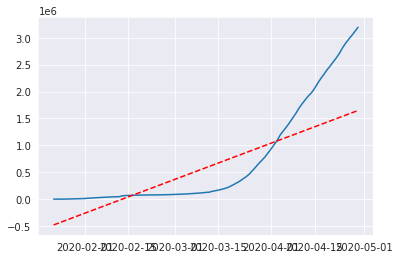

In [36]:
plt.plot(covid_datewise['Confirmed'],label='Actual Confirmed Cases')
plt.plot(covid_datewise.index,predicted_linreg,linestyle='--',color='red')
plt.show()

In [0]:
# ARIMA (P,D,Q)


In [0]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA 

In [0]:
train_arima = covid_datewise.iloc[: int(covid_datewise.shape[0] * 0.85)]
valid_arima= covid_datewise.iloc[int(covid_datewise.shape[0] * 0.85) : ]

In [39]:
valid_arima

,Confirmed,Deaths,Recovered,Mortality Rate,Days
ObservationDate,,,,,
2020-04-15,2056055.0,134177.0,24.854345,6.525944,84
2020-04-16,2152647.0,143801.0,25.183274,6.680194,85
2020-04-17,2240191.0,153822.0,25.370292,6.866468,86
2020-04-18,2317759.0,159510.0,25.555677,6.882079,87
2020-04-19,2401379.0,165044.0,25.981030,6.872884,88
2020-04-20,2472259.0,169986.0,26.119351,6.875736,89
2020-04-21,2549123.0,176583.0,26.668741,6.927206,90
2020-04-22,2623960.0,183066.0,27.046678,6.976707,91
2020-04-23,2708885.0,190858.0,27.261622,7.045629,92


In [0]:
log_series=np.log(train_arima['Confirmed'])

In [41]:
log_series

ObservationDate
2020-01-22     6.318968
2020-01-23     6.481577
2020-01-24     6.846943
2020-01-25     7.271009
2020-01-26     7.658228
                ...    
2020-04-10    14.341256
2020-04-11    14.387345
2020-04-12    14.428900
2020-04-13    14.466439
2020-04-14    14.496682
Name: Confirmed, Length: 84, dtype: float64

In [44]:
model_ma = ARIMA(log_series, (1, 1, 2))
Arima_fit_model = model_ma.fit()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [0]:
predicted_ma=Arima_fit_model.forecast(len(valid_arima))[0]

In [0]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA


In [0]:
train_arima = covid_datewise.iloc[: int(covid_datewise.shape[0] * 0.85)]
valid_arima = covid_datewise.iloc[int(covid_datewise.shape[0] * 0.85) : ]


In [48]:
valid_arima


,Confirmed,Deaths,Recovered,Mortality Rate,Days
ObservationDate,,,,,
2020-04-15,2056055.0,134177.0,24.854345,6.525944,84
2020-04-16,2152647.0,143801.0,25.183274,6.680194,85
2020-04-17,2240191.0,153822.0,25.370292,6.866468,86
2020-04-18,2317759.0,159510.0,25.555677,6.882079,87
2020-04-19,2401379.0,165044.0,25.981030,6.872884,88
2020-04-20,2472259.0,169986.0,26.119351,6.875736,89
2020-04-21,2549123.0,176583.0,26.668741,6.927206,90
2020-04-22,2623960.0,183066.0,27.046678,6.976707,91
2020-04-23,2708885.0,190858.0,27.261622,7.045629,92


In [0]:
log_series = np.log(train_arima['Confirmed'])


In [50]:
model_ma = ARIMA(log_series, (0, 2, 1))
Arima_fit_model = model_ma.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [0]:
predicted_ma=Arima_fit_model.forecast(len(valid_arima))[0]

In [52]:
predicted_ma

array([14.52770908, 14.55534527, 14.57959088, 14.60044592, 14.61791039,
       14.63198429, 14.64266761, 14.64996036, 14.65386253, 14.65437414,
       14.65149517, 14.64522562, 14.6355655 , 14.62251481, 14.60607355])

In [53]:
from sklearn.metrics import mean_squared_error
y_pred = valid_arima.copy()
prediction_ma = Arima_fit_model.forecast(len(valid_arima))[0]
y_pred["MA Model Prediction"]=list(np.exp(prediction_ma))

model_scores=[]
model_scores.append(np.sqrt(mean_squared_error(list(valid_arima["Confirmed"]),np.exp(prediction_ma))))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(list(valid_arima["Confirmed"]),np.exp(prediction_ma))))


Root Mean Square Error for MA Model:  504932.3790653749


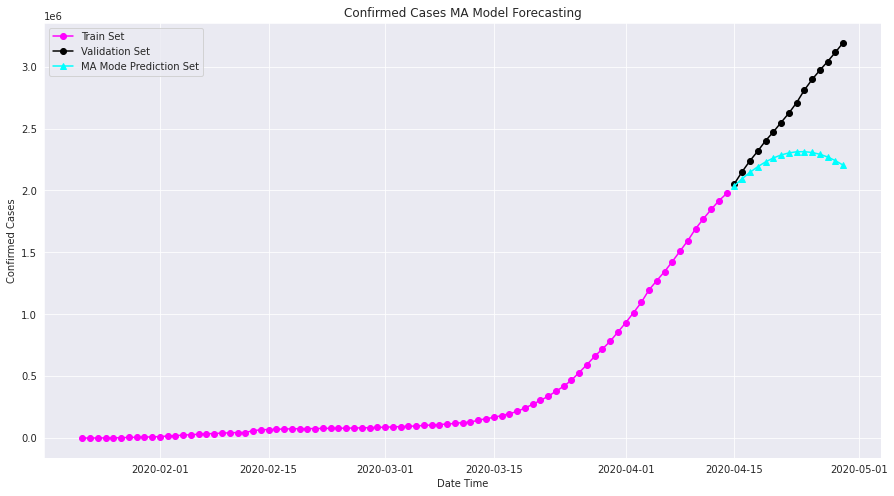

In [54]:
plt.figure(figsize=(15,8))
plt.plot(train_arima.index,train_arima["Confirmed"],label="Train Set", marker='o', color = 'magenta')
plt.plot(valid_arima.index,valid_arima["Confirmed"], label="Validation Set", marker='o', color = 'k')
plt.plot(y_pred["MA Model Prediction"], label="MA Mode Prediction Set", marker='^', color = 'cyan')
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases MA Model Forecasting")
plt.show()
